# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion

_Lina Arias, Laura Goyeneche; Roberto Sanchez; Luis Tejerina; Eric Torres_

In [1]:
%%capture
%matplotlib inline
from scldata_simulation import * 

In [2]:
# Instantiate simulator 
scldata_simulation = SCLdataSimulation()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# price shock components 
# - You can choose which components are affected by exogenous impact 
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]

# shock_weight
# - pct impact of exogenous impact
shock_weight = 0.20

# population affected - shock_weight
# - specify whether the impact is focused on a subgroup of the population
# self-employed or independent workers in the agricultural sector will not be impacted by the Shock
shock_population = {'sec_agri': 0}

# income_growth 
# - Control by GDP growth
#gdp_growth = 0.024

In [6]:
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]

change_A = scldata_simulation.simulate_shock(shock_component, shock_weight, shock_population, gdp_growth_population='', year='2022')
scldata_simulation.region_results(change_A)

,pais_c,population,poor_int_pop,poor_int_delta_pop,poor31_int_pop,poor31_int_delta_pop,poor_national_pop,poor_national_delta_pop,poor_e_national_pop,poor_e_national_delta_pop,poor_national_new_recovery,poor_e_national_new_recovery,poor_int,poor_int_delta,poor31_int,poor31_int_delta,poor_national,poor_national_delta,poor_e_national,poor_e_national_delta
0,LAC,594945580.312,205626280.663,198975501.635,117770812.590,111155281.743,211221653.122,223382475.468,73136580.752,87230344.374,198302474.633,297735368.452,0.357,0.345,0.204,0.193,0.366,0.387,0.127,0.151


In [11]:
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales']

change_B = scldata_simulation.simulate_shock(shock_component, shock_weight, shock_population, gdp_growth_population='', year='2022')
scldata_simulation.region_results(change_B)

,pais_c,population,poor_int_pop,poor_int_delta_pop,poor31_int_pop,poor31_int_delta_pop,poor_national_pop,poor_national_delta_pop,poor_e_national_pop,poor_e_national_delta_pop,poor_national_new_recovery,poor_e_national_new_recovery,poor_int,poor_int_delta,poor31_int,poor31_int_delta,poor_national,poor_national_delta,poor_e_national,poor_e_national_delta
0,LAC,594945580.312,197905299.006,198710494.846,110203783.417,110866575.127,211221653.122,219342679.124,73136580.752,83393773.987,109632005.453,178443682.030,0.343,0.345,0.191,0.192,0.366,0.380,0.127,0.144


In [12]:
# Get the weight of the shock component by country
scldata_simulation.get_poverty_lines(shock_component)[['pais_c', 'weight']].drop_duplicates().head(2)

,pais_c,weight
0,ARG,0.670
33,BHS,0.815


In [51]:
# Get the growth by country
scldata_simulation.get_gdp_growth(year='2022').sort_values('gdp_change', ascending=False).head(5)

,pais_c,gdp_change
17,GUY,0.487
27,LCA,0.131
26,KNA,0.100
4,BRB,0.085
28,VCT,0.083


In [52]:
change = scldata_simulation.simulate_shock(shock_component, shock_weight, shock_population, gdp_growth_population='', year='2022')

## Deltas by Country

In [32]:
country_group = scldata_simulation.country_results(change)
#country_group[['anio_c', 'pais_c', 'poor_int', 'poor_int_delta', 'poor31_int',
#       'poor31_int_delta', 'poor_national', 'poor_national_delta',
#       'poor_e_national','poor_e_national', 'poor_e_national_delta']]

<Figure size 1200x800 with 0 Axes>

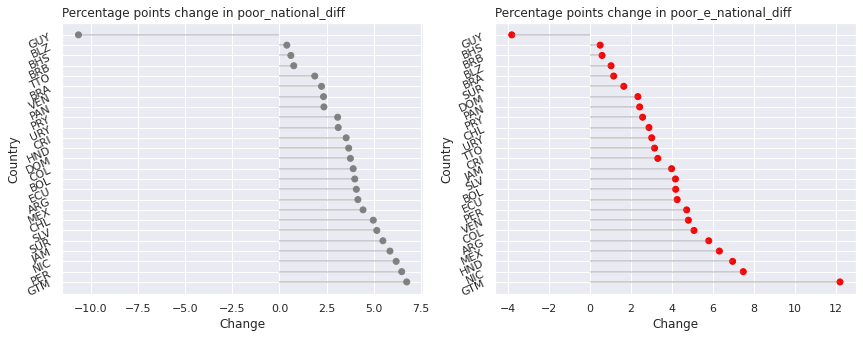

In [33]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
variables = ['poor_national', 'poor_e_national']
for variable in variables:
    country_group[variable +'_diff'] = (country_group[variable + '_delta'] - country_group[variable])*100  
variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])
country_group_melt = pd.melt(country_group[variables],id_vars=['anio_c', 'pais_c'],var_name='metrics', value_name='values')

country_group_melt['color'] = np.where(country_group_melt['metrics']=='poor_national_diff', 'grey', 'red')

# Figure by poverty level 
plt.figure(figsize = (22,5))

for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = country_group_melt[country_group_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=['values'], ascending=False)
    # Subplot
    plt.subplot(1,3,i+1)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y = my_range, xmin=0, 
               xmax = ordered_df['values'], 
               color ='grey', alpha=0.4)
    plt.scatter(ordered_df['values'], my_range, color=ordered_df.color, alpha=1) 
    plt.yticks(my_range, ordered_df['pais_c'])
    plt.title("Percentage points change in {0}".format(variable), loc='left')
    plt.xlabel('Change')
    plt.ylabel('Country')
    plt.yticks(rotation = 25)
    
plt.show()

### By country (population)

## Deltas by Group

In [13]:
group = ['sec_agri']
group_delta = scldata_simulation.population_segmentation_results(tasas=change, categories= group)
group_delta

,sec_agri,poor_int_pop,poor_int_delta_pop,poor31_int_pop,poor31_int_delta_pop,poor_national_pop,poor_national_delta_pop,poor_e_national_pop,poor_e_national_delta_pop,population,poor_int,poor_int_delta,poor31_int,poor31_int_delta,poor_national,poor_national_delta,poor_e_national,poor_e_national_delta
0,0,171320397.661,206383629.242,93678758.118,116462584.330,201788492.258,201570440.977,68452478.430,70819241.345,575908734.046,0.307,0.370,0.168,0.209,0.361,0.361,0.122,0.127
1,1,10056801.700,9820149.849,6449854.733,6184536.364,9433160.864,9127741.665,4684102.323,4479173.123,19036846.266,0.534,0.521,0.342,0.328,0.498,0.482,0.247,0.237


#### Distribution of poverty rate changes in percentual points by country

In [14]:
shock_component = ['Granos',
                   'Panes y\ncereales']

shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat.csv', index=False)

In [15]:
shock_component = ['Granos']
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_Granos.csv', index=False)

In [36]:
shock_component = ['Alimentos fuera del hogar',
                   'Bebidas no alcohólicas',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_all_no_meat.csv', index=False)

In [37]:
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_all.csv', index=False)

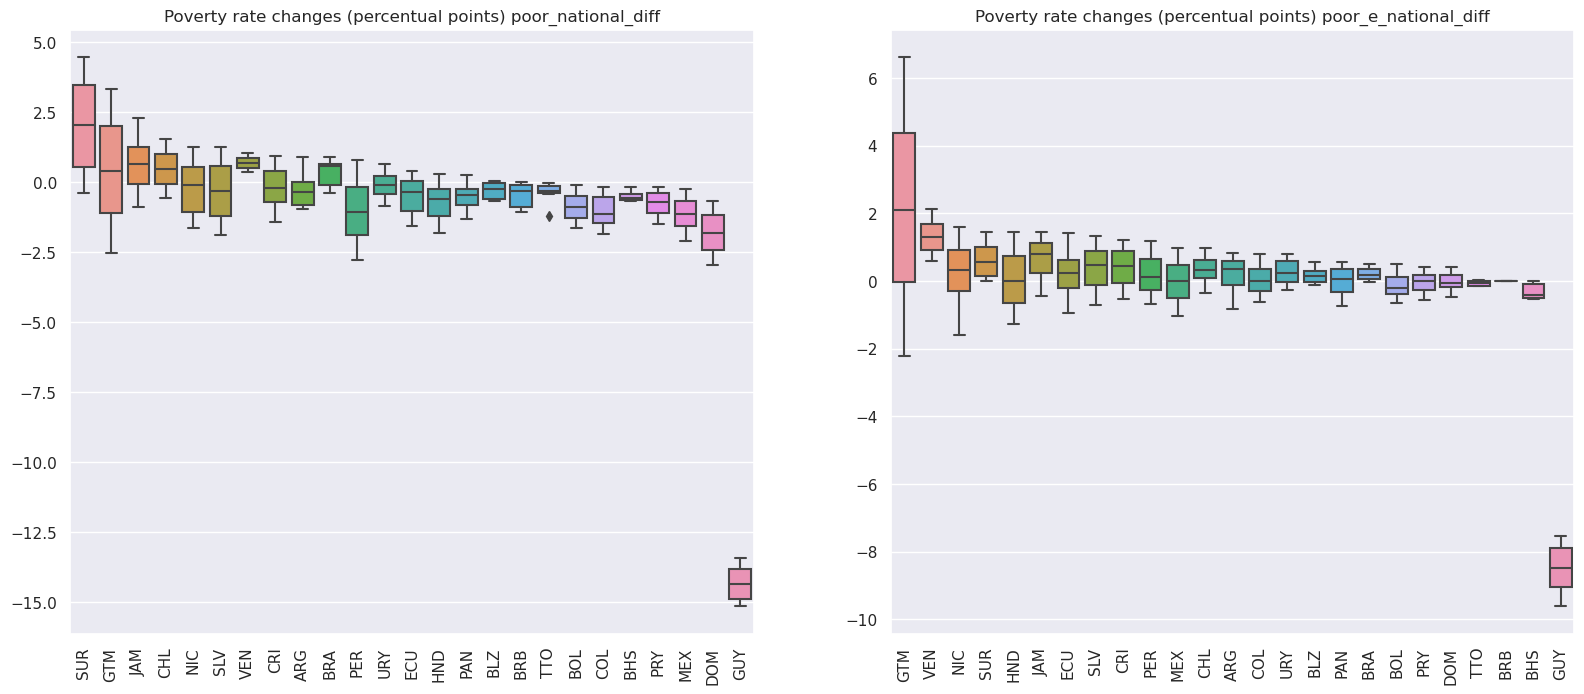

In [30]:
fig=plt.figure(figsize=(30,8), dpi= 100, facecolor='w', edgecolor='k')

variables = ['poor_national', 'poor_e_national']
for variable in variables:
    simulations_concat[variable +'_diff'] = (simulations_concat[variable + '_delta'] - simulations_concat[variable])*100  

variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])

simulations_melt = pd.melt(simulations_concat[variables],id_vars=['anio_c', 'pais_c'],
                           var_name='metrics',
                           value_name='values')
simulations_melt['color'] = np.where(simulations_melt['metrics']=='poor_national_diff', 'grey', 'red')



for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = simulations_melt[simulations_melt.metrics==variable]
    #ordered_df = ordered_df.sort_values(by=[ 'pais_c'], ascending=False)
    ordered_df = ordered_df.sort_values(by=[ 'values'], ascending=False)
    
    # Subplot
    plt.subplot(1,3,i+1)
    #plt.figure(figsize = (9,5))
    my_range=range(1, len(ordered_df.index)+1 )
    
    # Distribution in changes in PL
    ax = sns.boxplot(x = 'pais_c', y = 'values', data = ordered_df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Poverty rate changes (percentual points) ' + variable)
    ax.tick_params(axis='x', rotation=90)

plt.show()